In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats

In [3]:
# Import Files
file = "new_data_2.csv"
tracks = pd.read_csv(file, parse_dates=['release_date'])
tracks.head() # tracks have 72720 rows x 19 columns

,Unnamed: 0,name,popularity,duration_in_seconds,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,month,year,quarter
0,0,A Lover's Concerto,41,159.560,0,['The Toys'],2020-03-13,0.671,0.867,-2.706,0.0571,0.436,0.000000,0.1390,0.839,120.689,2020-03-01,2020,2020Q1
1,1,The September Of My Years - Live At The Sands ...,26,187.333,0,['Frank Sinatra'],2018-05-04,0.319,0.201,-17.796,0.0623,0.887,0.000000,0.9040,0.239,117.153,2018-05-01,2018,2018Q2
2,2,It Was A Very Good Year - Live At The Sands Ho...,25,236.800,0,['Frank Sinatra'],2018-05-04,0.269,0.129,-18.168,0.0576,0.938,0.000005,0.6830,0.160,82.332,2018-05-01,2018,2018Q2
3,3,"The Circle Game - Live at The 2nd Fret, Philad...",18,313.093,0,['Joni Mitchell'],2020-10-30,0.644,0.212,-14.118,0.0347,0.881,0.000022,0.7980,0.441,117.072,2020-10-01,2020,2020Q4
4,4,"Urge For Going - Live at The 2nd Fret, Philade...",18,295.093,0,['Joni Mitchell'],2020-10-30,0.627,0.184,-15.533,0.0450,0.955,0.000162,0.0986,0.299,115.864,2020-10-01,2020,2020Q4


A total of 10235 songs were released in 2015.
A total of 10777 songs were released in 2016.
A total of 9780 songs were released in 2017.
A total of 10715 songs were released in 2018.
A total of 11746 songs were released in 2019.
A total of 13741 songs were released in 2020.
A total of 5726 songs were released in 2021.


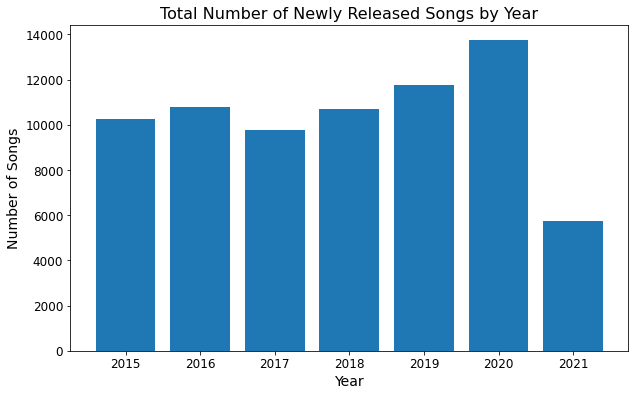

In [6]:
# Volume of released music per year

tracks_2015 = len(tracks.loc[tracks['release_date'] < "2016-01-01"]) #10264
tracks_2016 = len(tracks.loc[(tracks["release_date"] > "2015-12-31") & (tracks["release_date"] < "2017-01-01")]) #10804
tracks_2017 = len(tracks.loc[(tracks["release_date"] > "2016-12-31") & (tracks["release_date"] < "2018-01-01")]) #9792
tracks_2018 = len(tracks.loc[(tracks["release_date"] > "2017-12-31") & (tracks["release_date"] < "2019-01-01")]) #10771
tracks_2019 = len(tracks.loc[(tracks["release_date"] > "2018-12-31") & (tracks["release_date"] < "2020-01-01")]) #11771
tracks_2020 = len(tracks.loc[(tracks["release_date"] > "2019-12-31") & (tracks["release_date"] < "2021-01-01")]) #13766
tracks_2021 = len(tracks.loc[tracks["release_date"] > "2020-12-31"]) #5775

# Print result:
TotalVolume = [tracks_2015, tracks_2016, tracks_2017, tracks_2018, tracks_2019, tracks_2020, tracks_2021]
i = 2015
for volume in TotalVolume:
    print(f"A total of {volume} songs were released in {i}.")
    i = i + 1

# To graph this in a bar chart
x_axis = np.arange(2015, 2022, 1)
plt.figure(figsize=(10,6))
plt.bar(x=x_axis, height=TotalVolume)
plt.title("Total Number of Newly Released Songs by Year", fontsize=16)
plt.xlabel("Year", fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Number of Songs", fontsize=14)
plt.savefig("Total Number of Newly Released Songs by Year", facecolor="white")
plt.show()

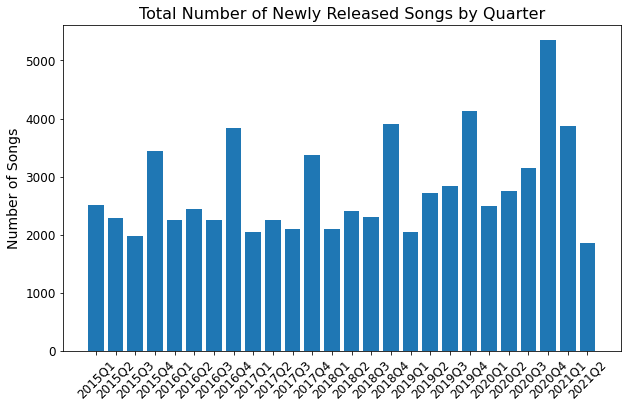

In [11]:
# Quarterly volume change

# Set up axis
x_axis_quarterly = tracks["quarter"].unique().tolist()
x_axis_quarterly.sort()
tracks_quarter = tracks.groupby("quarter")
height_quarter = tracks_quarter["name"].count()

# Graph
plt.figure(figsize=(10,6))
plt.bar(x=x_axis_quarterly, height=height_quarter)
plt.title("Total Number of Newly Released Songs by Quarter", fontsize=16)
plt.ylabel("Number of Songs", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("Total Number of Newly Released Songs by Quarter", facecolor="white")
plt.show()

In [13]:
# Let's look at Music Trend by Year
grouped_avg = tracks.groupby("year").agg({"danceability": "mean","energy":"mean", "speechiness":"mean", 
                                      "acousticness":"mean", "valence":"mean", "explicit":"mean"})
grouped_avg

,danceability,energy,speechiness,acousticness,valence,explicit
year,,,,,,
2015,0.598816,0.650896,0.084369,0.293570,0.508292,0.102785
2016,0.607457,0.658413,0.093959,0.282334,0.495939,0.125638
2017,0.625758,0.659662,0.100114,0.278274,0.493427,0.172290
2018,0.635623,0.653849,0.105013,0.276002,0.482426,0.190201
2019,0.650893,0.636790,0.110389,0.293986,0.493060,0.216755
2020,0.658587,0.639914,0.111564,0.271072,0.501836,0.219853
2021,0.668219,0.608707,0.126650,0.288460,0.495748,0.275410


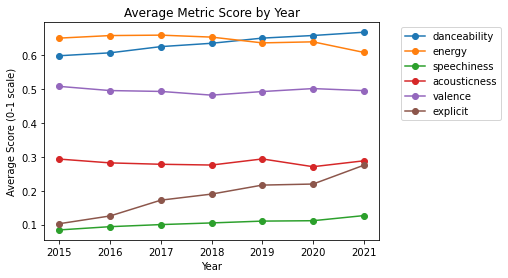

In [14]:
# Graph the above mean values
plt.plot(grouped_avg,marker ="o")
plt.xlabel("Year")
plt.ylabel("Average Score (0-1 scale)")
plt.title("Average Metric Score by Year")
plt.legend(["danceability", "energy", "speechiness", "acousticness", "valence", "explicit"],bbox_to_anchor=(1.05, 1), loc='upper left')

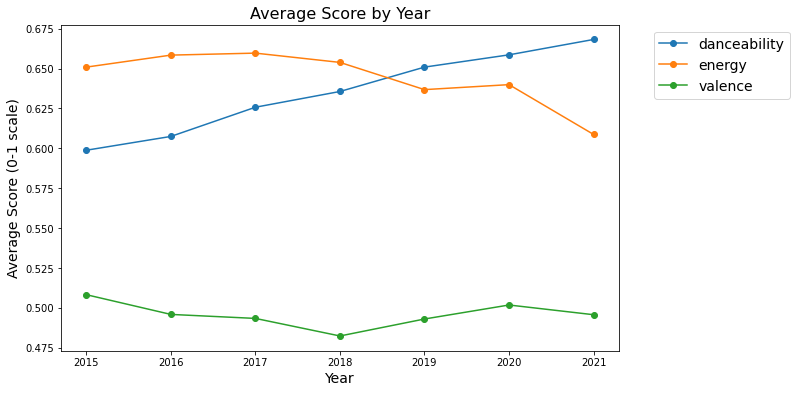

In [38]:
# Dividing the above graph based on its scale. High score categories are "danceability", "energy", "valence"
plt.figure(figsize=(10,6))

plt.plot(grouped_avg.iloc[:,[0, 1, 4]], marker="o")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Score (0-1 scale)", fontsize=14)
plt.title("Average Score by Year", fontsize=16)
plt.legend(["danceability", "energy", "valence"],bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig("Average High Score by Year", facecolor="white", bbox_inches='tight')
plt.show()

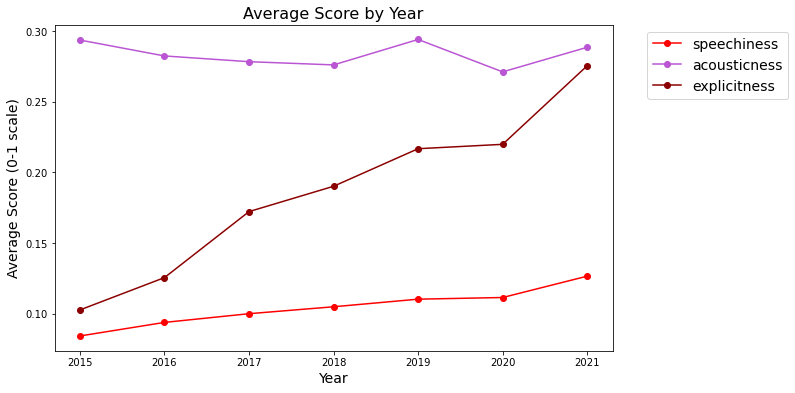

In [51]:
# Low score categories are "acousticness", "explicit", and "speechness"
plt.figure(figsize=(10,6))
plt.plot(grouped_avg.iloc[:,2], marker="o", color="red")
plt.plot(grouped_avg.iloc[:,3], marker="o", color="mediumorchid")
plt.plot(grouped_avg.iloc[:,5], marker="o", color="darkred")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Score (0-1 scale)", fontsize=14)
plt.title("Average Score by Year", fontsize=16)
plt.legend(["speechiness", "acousticness", "explicitness"],bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig("Average Low Score by Year", facecolor="white", bbox_inches='tight')
plt.show()


In [52]:
# Music Trends by Quarter
quarter_avg = tracks.groupby("quarter").agg({"danceability": "mean","energy":"mean", "speechiness":"mean", 
                                      "acousticness":"mean", "valence":"mean", "explicit":"mean"})
quarter_avg

,danceability,energy,speechiness,acousticness,valence,explicit
quarter,,,,,,
2015Q1,0.584864,0.626621,0.082869,0.326555,0.505978,0.088995
2015Q2,0.610594,0.662087,0.086493,0.285517,0.533339,0.116157
2015Q3,0.601135,0.650363,0.086106,0.293114,0.501693,0.124811
2015Q4,0.599846,0.661488,0.083057,0.275107,0.497138,0.091331
2016Q1,0.609675,0.643162,0.091436,0.306751,0.512649,0.110667
2016Q2,0.624561,0.648443,0.095057,0.283944,0.515442,0.121671
2016Q3,0.610468,0.639502,0.090701,0.309633,0.502124,0.141522
2016Q4,0.593519,0.684760,0.096646,0.251022,0.470125,0.127637
2017Q1,0.624340,0.644630,0.097600,0.301165,0.510460,0.132911


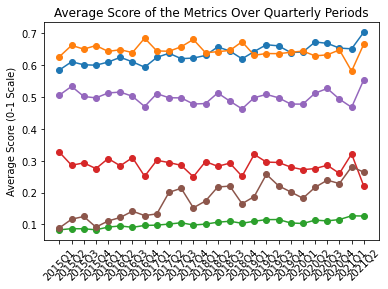

In [56]:
plt.plot(quarter_avg, marker="o")
plt.title("Average Score of the Metrics Over Quarterly Periods")
plt.xticks(rotation=45)
plt.ylabel("Average Score (0-1 Scale)")
plt.show()

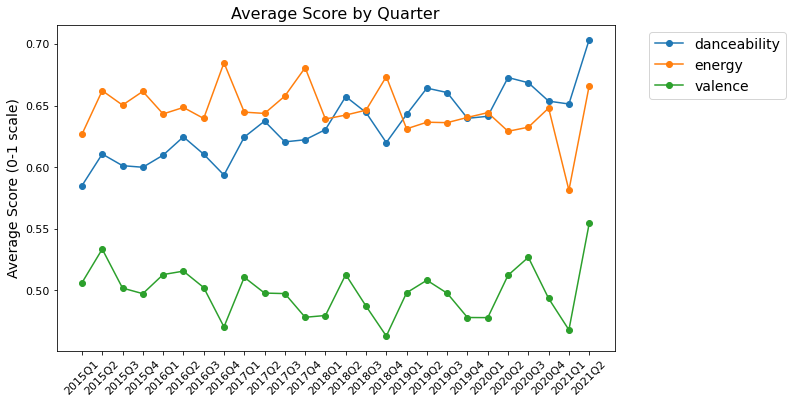

In [59]:
# High Value Contents
plt.figure(figsize=(10,6))
plt.plot(quarter_avg.iloc[:,[0,1,4]], marker="o")
plt.title("Average Score by Quarter", fontsize=16)
plt.xticks(rotation=45, fontsize=11)
plt.ylabel("Average Score (0-1 scale)", fontsize=14)
plt.yticks(fontsize=11)
plt.legend(["danceability", "energy", "valence"],bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig("Average High Score by Quarter", facecolor="white", bbox_inches='tight')
plt.show()

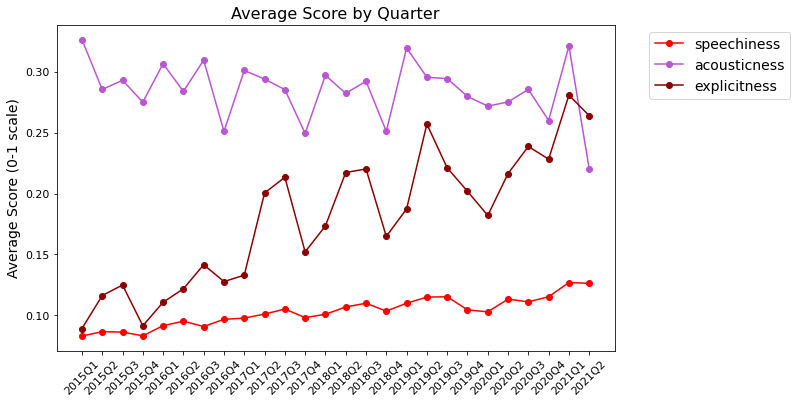

In [61]:
# Low Value Contents

plt.figure(figsize=(10,6))
plt.plot(quarter_avg.iloc[:,2], marker="o", color="red")
plt.plot(quarter_avg.iloc[:,3], marker="o", color="mediumorchid")
plt.plot(quarter_avg.iloc[:,5], marker="o", color="darkred")
plt.xticks(rotation=45, fontsize=11)
plt.ylabel("Average Score (0-1 scale)", fontsize=14)
plt.yticks(fontsize=11)
plt.title("Average Score by Quarter", fontsize=16)
plt.legend(["speechiness", "acousticness", "explicitness"],bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.savefig("Average Low Score by Quarter", facecolor="white", bbox_inches='tight')
plt.show()